In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import altair as alt

In [71]:
# load TPM data
tpm_data_file = 'data/TPM_counts.tsv'
sample2condition_file = 'data/sample2condition.txt'
genome_filename = "data/genome.txt"

genome = ""
nucleotides = {'A': 0, 'C': 1, 'G': 2, 'T': 3}

# load TPM data
df = pd.read_csv(tpm_data_file,sep='\t').fillna('')

    
# load mapping from sample to condition
with open(sample2condition_file,'r') as f:
    sample2condition = dict(x.strip().split() for x in f.readlines())
    
# Parses the genome itself and stores as a single string
with open(genome_filename) as file:
    cur_seq_num = 0
    for i, line in enumerate(file):
        if line[0] == '>':
            cur_seq_num += 1

        elif cur_seq_num == 1:
            cleaned_line = str(cleanSequence(line))
            genome += cleaned_line
        else:
            break
    

In [52]:
# Cleans up a given line from the genome and replaces all non aAcCgGtT
# values with 'T' as per to the instructions of the spec (not ideal
# but functions as a good alternative)
def cleanSequence(line):

    cleaned_seq = ""
    for basepair in line:
        if basepair.upper() in nucleotides.keys():
            cleaned_seq += basepair.upper()

        elif basepair != '\n':
            cleaned_seq += 'T'

    return cleaned_seq.replace("\n", "")

In [10]:
# Unique types of genes present: 

loci_types = np.unique(df["type"])
loci_types

array(['CDS', 'ncRNA', 'rRNA', 'tRNA', 'tmRNA'], dtype=object)

# ncRNA

In [81]:
df_noncoding_only = df[df["type"] == 'ncRNA'].reset_index().iloc[:, 1:8]
df_noncoding_only.drop(['locus', 'gene_symbol'], axis = 1)

,locus_tag,product,type,start_coord,end_coord
0,EQU24_RS04160,,ncRNA,874502,874683
1,EQU24_RS09235,,ncRNA,2044551,2044648
2,EQU24_RS19765,,ncRNA,4442620,4442986


In [45]:
df_nonconding_seqs = df[df["locus_tag"] == 'EQU24_RS04160']
df_nonconding_seqs.type

801    ncRNA
Name: type, dtype: object

In [76]:
# EQU24_RS04160
genome[874502:874683 + 1]

# https://rnacentral.org/sequence-search/?jobid=e902344f-17ac-47f0-8f03-193539c8e511

'GTATCTCCCACCTGCGCCGTAATGAGCTTTCGTCCTTGAACCGACGGTTCAAGTGGGAACGCAGATGGCCTTTCAGGCTTCCCGCGTAAAGCGGGTATGCACACCAATGCCGAACAATTGTTCCCGGGGTAAATATAGGTTCAGGAAACACCCAGCCCACCCTCGAACGCTGCAGGAGATAC'

### EQU24_RS04160 - Structure: 

- RNA Central:

- MXfold2: 
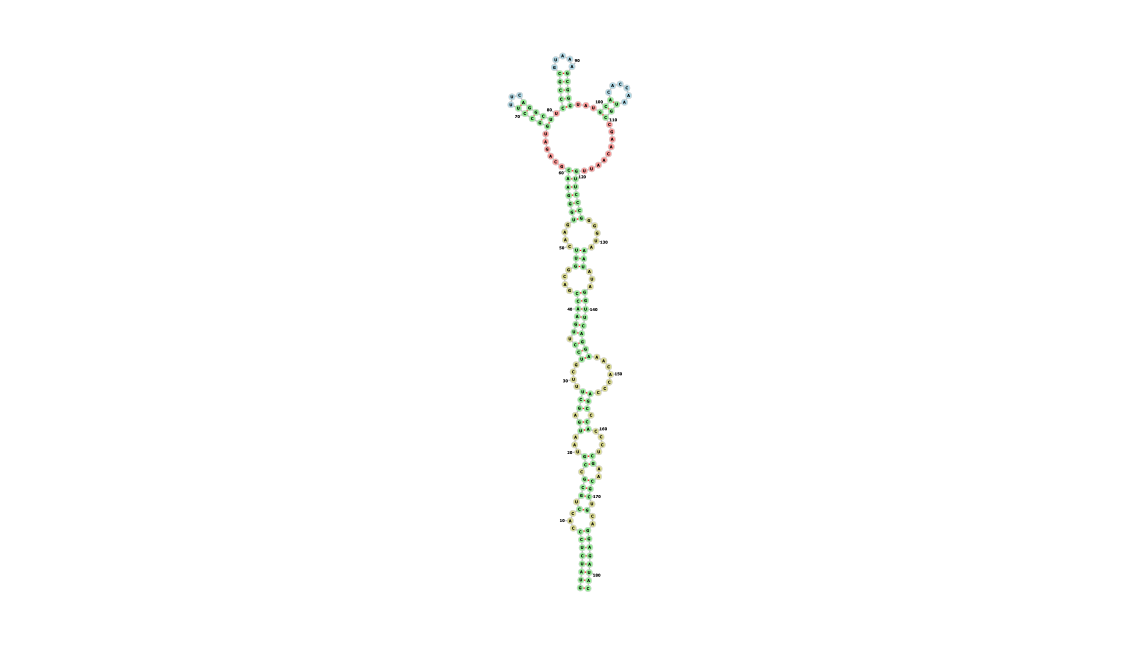  
***

In [77]:
#EQU24_RS09235
genome[2044551:2044648 + 1]

# https://rnacentral.org/sequence-search/?jobid=683f2cf6-4055-4025-98c2-4f34bc8cf832

'TGTCGGTCCTCCCGCAACGATACGCTGTAAACCCCGCCAGGCCCGGAAGGGAGCAACGGTAGCAGCAGATTCGTGTGCCGGGATGCGGCTGGCAAGGT'

### EQU24_RS09235 - Structure: 

- RNA Central:


- MXfold2: 
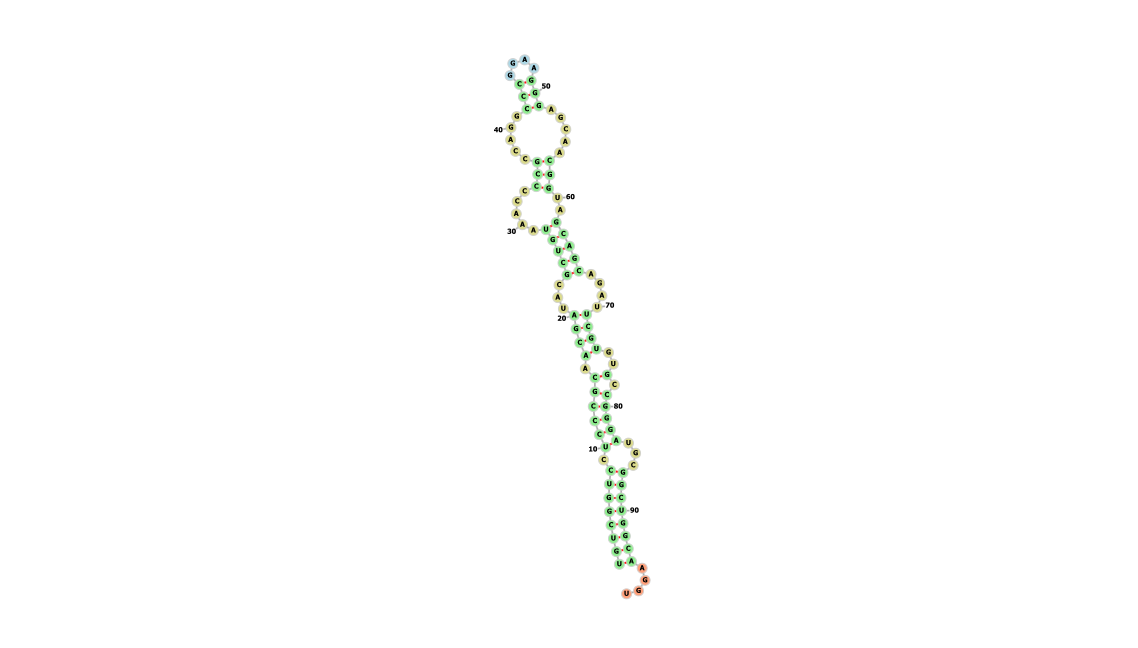

In [78]:
# EQU24_RS19765
genome[4442620:4442986 + 1]
 
# https://rnacentral.org/sequence-search/?jobid=0f026e6b-5732-41b3-be4a-4bcc22a858f3

'AAAAAGAGTCGGCCTGTAAGCCGGGTTCTGTCGCGAACAGTCATTCATCTAGGCCGCAAGTCACCTTACGGCTCGAGCGATCTACCCGGGAACCGCGCGGGCCACGCGTCTGTCCCCCTATTTGATCTTGCTCCGAGTGGGGTTTGCCCTGCCACGCCTGTTACCAGCCGCGCGGTGCGCTCTTACCGCACCATTTCACCCTTACCCCCCACCTAGAATCCAGATTCTAGGTGGGGGGCGGTATATTTTCTGTGGCACTTTCCGTAGGCTCGCGCCTCCCAGGCATTACCTGGCACTCTGCCCAATGGAGCCCGGACTTTCCTCTCTTCTACCCTAAGGCAAAACAGCGACTGTCCGGCCGACTCTC'

### EQU24_RS19765 - Structure: 

- RNA Central:




- MXfold2: 
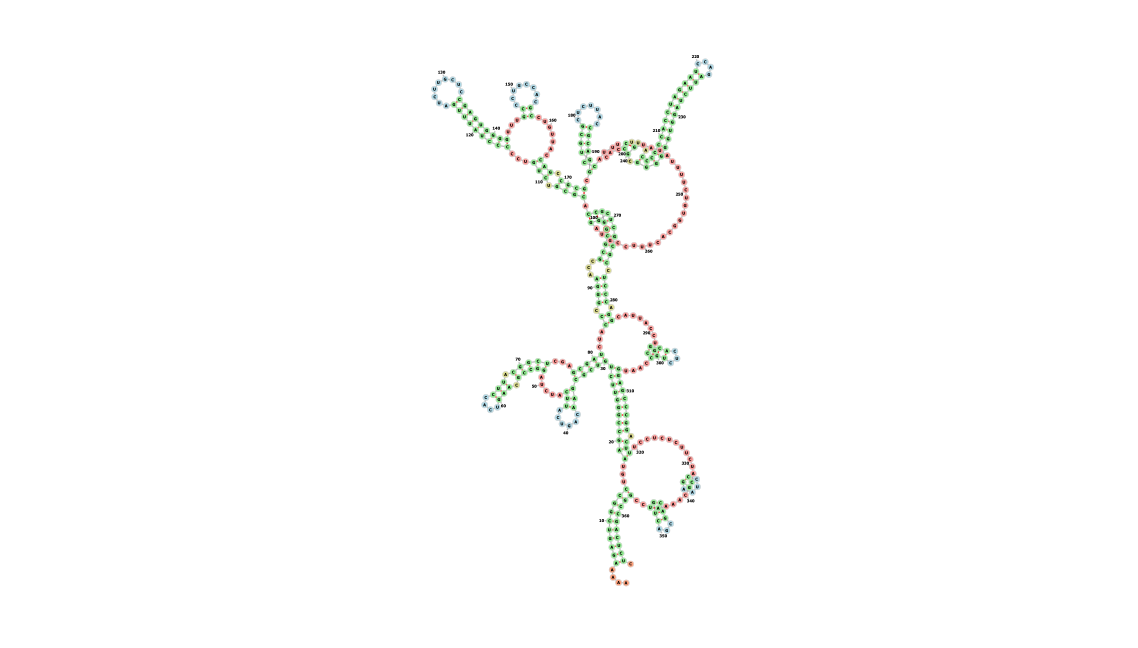

# tmRNA 



In [80]:
df_tm_rna_only = df[df["type"] == 'tmRNA'].reset_index().iloc[:, 1:8]
df_tm_rna_only.drop(['locus', 'gene_symbol'], axis = 1)

,locus_tag,product,type,start_coord,end_coord
0,EQU24_RS12525,,tmRNA,2807909,2808284


In [82]:
# EQU24_RS12525
genome[2807909:2808284 + 1]

#https://rnacentral.org/sequence-search/?jobid=6120ba6d-8310-4712-a01f-c94646f0fae9

'TGGTGGAGGCGGCGGGGATTGAACCCGCGTCCGCAAGCACTCCGCCACAAGCTCTACATGCTTATCCTGATCTTTTGATTTAACCGCCGGCTACCCGTCAGGCCAAGAAAACCGTCGGCGATTCCGTTAGGTTTTAGTGCGTCAGCTCCGGACAGGCATCGGCACGATCTTATGTGCTGTGACCCCTGAGTGATCCGAAGATCCTACCCGCATAAGCACAGATAGTCAGAGGAATGGTGGCTGTTTTTATGCAGCCAAAGCCATTGAGTAGTTTTCGTCGTTTGCGAATACTTTATTTCAGTAGGTTTTACGAGCTGTACTGTGCTCGGCATGCACTCAAGGTTTTGCTACCCACGTCGAAGCCATGTCGCCCCCT'

### Structure: 

- RNA Central could not find any matching templates

- MXfold2: 
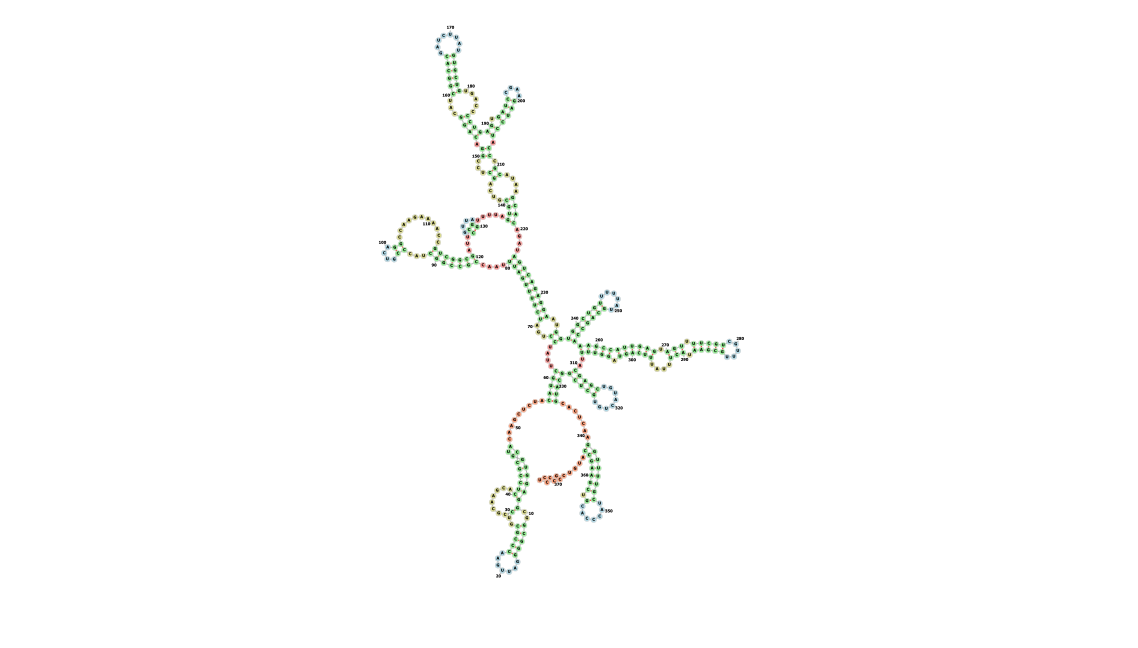